Machine learning Lab Work: Introduction to feature extraction

Import test image from user


Saving Intro_coin.jpg to Intro_coin.jpg


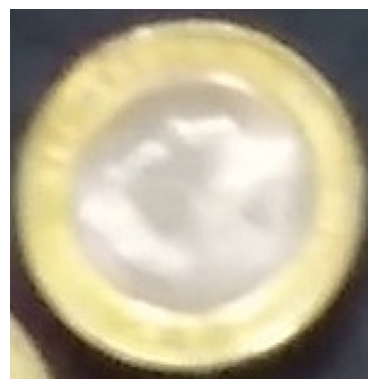

In [1]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

# Load an image from your computer to Google colab
image = cv2.imread('Intro_coin.jpg')

# Check if image loaded successfully
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert the image to RGB
    plt.imshow(image)
    plt.axis('off')
    plt.show()


Basic Image pre-processing, which includes converting the test image to grayscale then resizing and finally normalising the pixel values for the resized image.

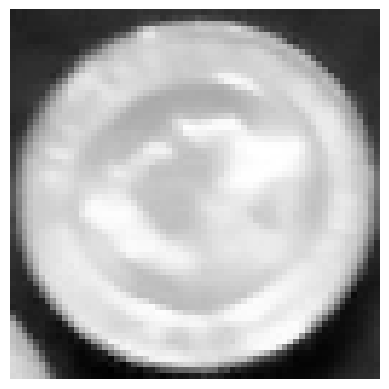

In [2]:
# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Resize image
resized_image = cv2.resize(gray_image, (64, 64))

# Normalise pixel values
normalized_image = resized_image / 255.0

# Display processed image
plt.imshow(normalized_image, cmap='gray')
plt.axis('off')
plt.show()


# Feature Extraction#: simple feature extraction for ML is performed here including the technique of histogram of orientation gradients (HOG) and edge detection through canny edge detector. This following code block implements the HOG method

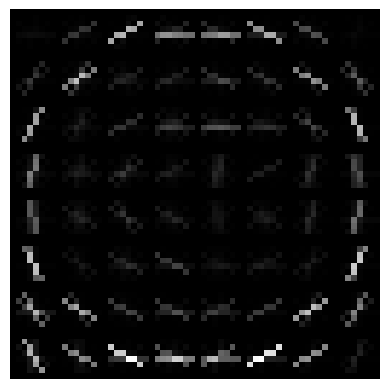

In [3]:
from skimage.feature import hog
from skimage import exposure

# Extract HOG features
features, hog_image = hog(normalized_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Display HOG image
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
plt.imshow(hog_image_rescaled, cmap='gray')
plt.axis('off')
plt.show()


This following block deals with the implementation of the canny edge detection method of feature extraction. It finishes by displaying the resulting images for the HOG, Canny edge detection and the pre-processed normailised image.

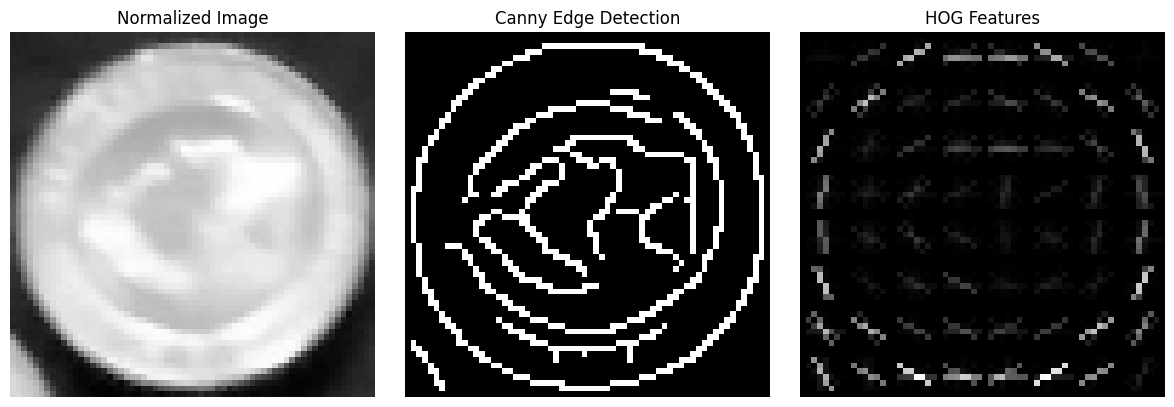

HOG features shape: (1764,)
Edge features shape: (4096,)
Combined features shape: (5860,)


In [4]:
from skimage.feature import hog, canny
from skimage import exposure
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Convert normalized image back to 8-bit format for edge detection
edge_image = (normalized_image * 255).astype('uint8')

# Step 2: Apply Canny edge detection
edges = canny(edge_image, sigma=1.0)  # Adjust sigma for smoother edges

# Step 3: Extract HOG features from the original normalized image
features, hog_image = hog(normalized_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Step 4: Display the results
plt.figure(figsize=(12, 4))

# Original normalized image
plt.subplot(1, 3, 1)
plt.imshow(normalized_image, cmap='gray')
plt.title('Normalized Image')
plt.axis('off')

# Edge-detected image
plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
# HOG visualization
plt.subplot(1, 3, 3)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
plt.imshow(hog_image_rescaled, cmap='gray')
plt.title('HOG Features')
plt.axis('off')

plt.tight_layout()
plt.show()

# Step 5: Combine HOG features and edge-detected image
# Flatten the edge-detected image to a feature vector
edge_features = edges.flatten()

# Combine HOG features and edge features
combined_features = np.concatenate((features, edge_features))

print("HOG features shape:", features.shape)
print("Edge features shape:", edge_features.shape)
print("Combined features shape:", combined_features.shape)
